In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore 

In [2]:
df=pd.read_csv(r"nba.csv")

In [ ]:
df.head()

In [ ]:
print("Dimensions:",df.shape)

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_count = len(numerical_cols)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_count = len(categorical_cols)

print(f"Number of numerical columns: {numerical_count}")
print(f"Number of categorical columns: {categorical_count}")


In [ ]:
df.info() 

In [ ]:
df.describe()            # check the numerical columns for better understanding of possible outliers 

In [ ]:
# Set pandas to display floating-point numbers in standard format
pd.set_option('display.float_format', '{:.2f}'.format)
print(df.head())


In [ ]:
df.dtypes             # understanding the data type for each column and salary converted to float 

In [ ]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col                                                     # catergorical col for calclulation 
# height is categorical should be converted to numerical 

In [ ]:
numerical_col=df.select_dtypes(include=['number']).columns
numerical_col                                              # numerical col

In [ ]:
skewness=df[numerical_col].skew()
skewness                           #  skewness of  numerical col number and salary is right skewed 

In [ ]:
df.isnull().sum()               # college and salary columns has multiple null values 


In [ ]:
for col in df.columns:
    if df[col].dtypes=="object":
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)                
# fill numerical col with mean and categorical by mode 

In [ ]:
df

In [ ]:
df['Height']=df['Height'].astype(str).str.replace('-','.')       # replace - with . for futher conversion 

In [ ]:
df['Height']=df['Height'].astype(float)                     # convert height into float 

In [ ]:
df    # height changed to float wih 2 decimal points 

In [ ]:
#z-score normalization 
# store outliers of numerical col 
outlier={}
for col in numerical_col:
    z_scores=zscore(df[col])
    outlier[col]=df[np.abs(z_scores)>3][col]
    df=df[np.abs(z_scores)<=3]

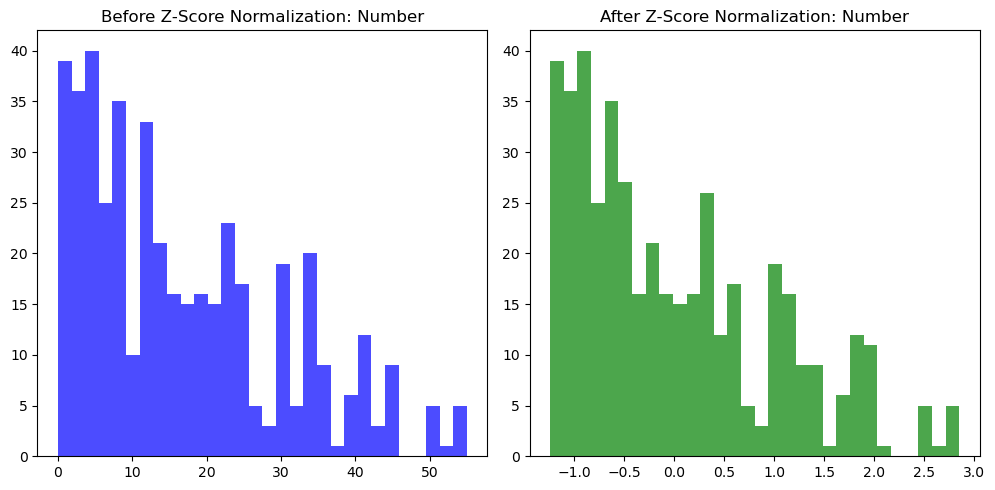

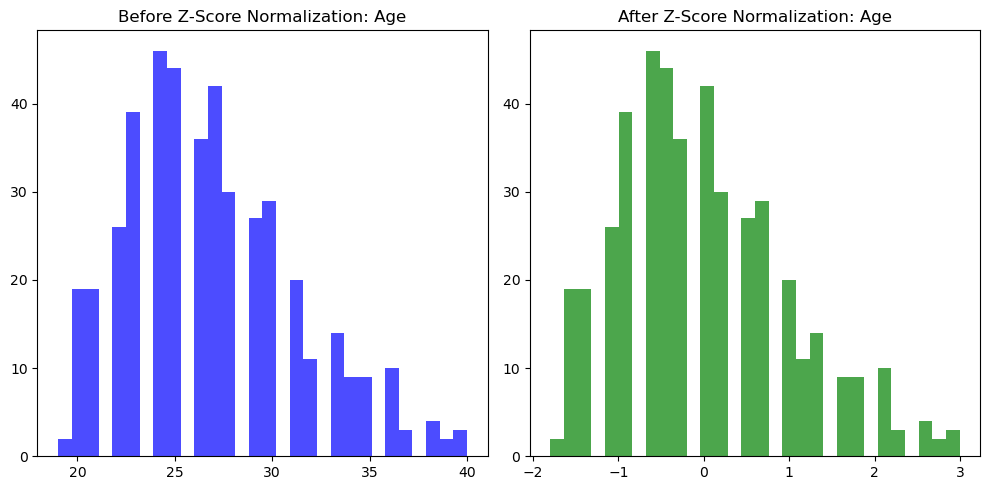

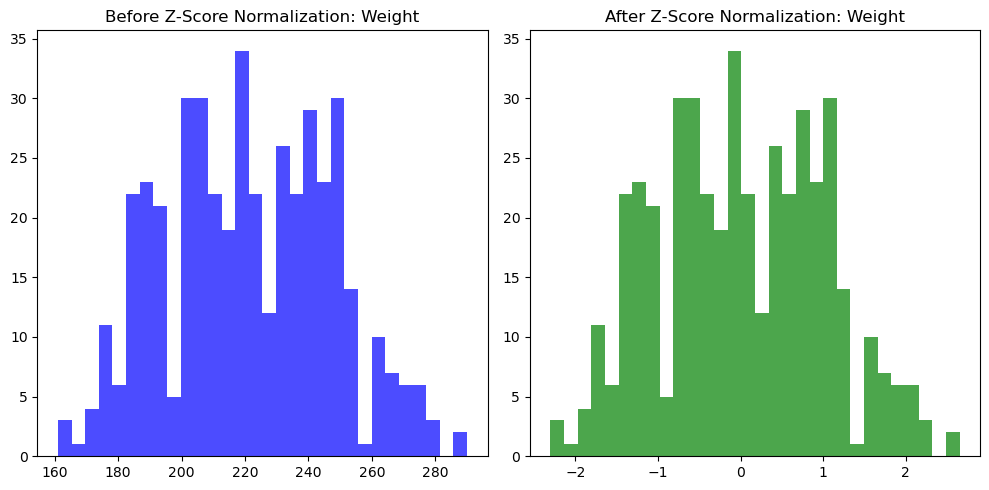

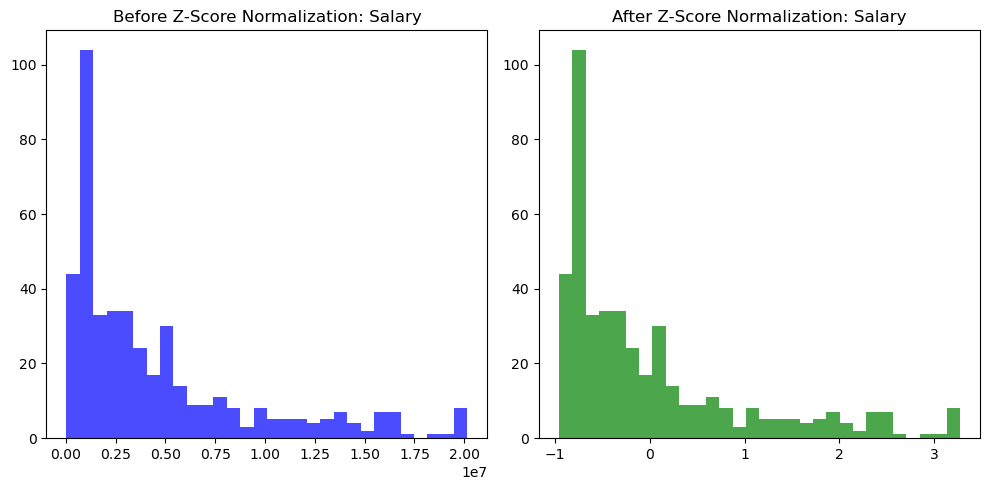

In [20]:
for col in numerical_col:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.title(f"Before Z-Score Normalization: {col}")
    
    # Z-Score Normalization
    df[col + '_zscore'] = zscore(df[col])  # Add normalized column
    plt.subplot(1, 2, 2)
    plt.hist(df[col + '_zscore'], bins=30, color='green', alpha=0.7)
    plt.title(f"After Z-Score Normalization: {col}")
    
    plt.tight_layout()
    plt.show() # no changes 


In [21]:
# drop duplicates  is duplicates found drop them 

if df.duplicated().sum()>0:                 
    df=df.drop_duplicates()

In [22]:
df.shape          #  duplicates droped  earlier data was 458 rows 

(444, 13)

In [23]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Number_zscore,Age_zscore,Weight_zscore,Salary_zscore
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6.20,180.00,Texas,7730337.00,-1.24,-0.43,-1.57,0.66
2,John Holland,Boston Celtics,30.00,SG,27.00,6.50,205.00,Boston University,4842684.11,0.99,0.03,-0.61,0.05
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6.50,185.00,Georgia State,1148640.00,0.84,-1.11,-1.38,-0.72
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6.10,231.00,Kentucky,5000000.00,-0.64,0.49,0.39,0.09
6,Jordan Mickey,Boston Celtics,55.00,PF,21.00,6.80,235.00,LSU,1170960.00,2.85,-1.34,0.54,-0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.00,PG,26.00,6.30,203.00,Butler,2433333.00,-0.64,-0.20,-0.69,-0.45
454,Raul Neto,Utah Jazz,25.00,PG,24.00,6.10,179.00,Kentucky,900000.00,0.62,-0.65,-1.61,-0.78
455,Tibor Pleiss,Utah Jazz,21.00,C,26.00,7.30,256.00,Kentucky,2900000.00,0.32,-0.20,1.34,-0.36
456,Jeff Withey,Utah Jazz,24.00,C,26.00,7.00,231.00,Kansas,947276.00,0.54,-0.20,0.39,-0.77


In [22]:
# min_max_normalized     

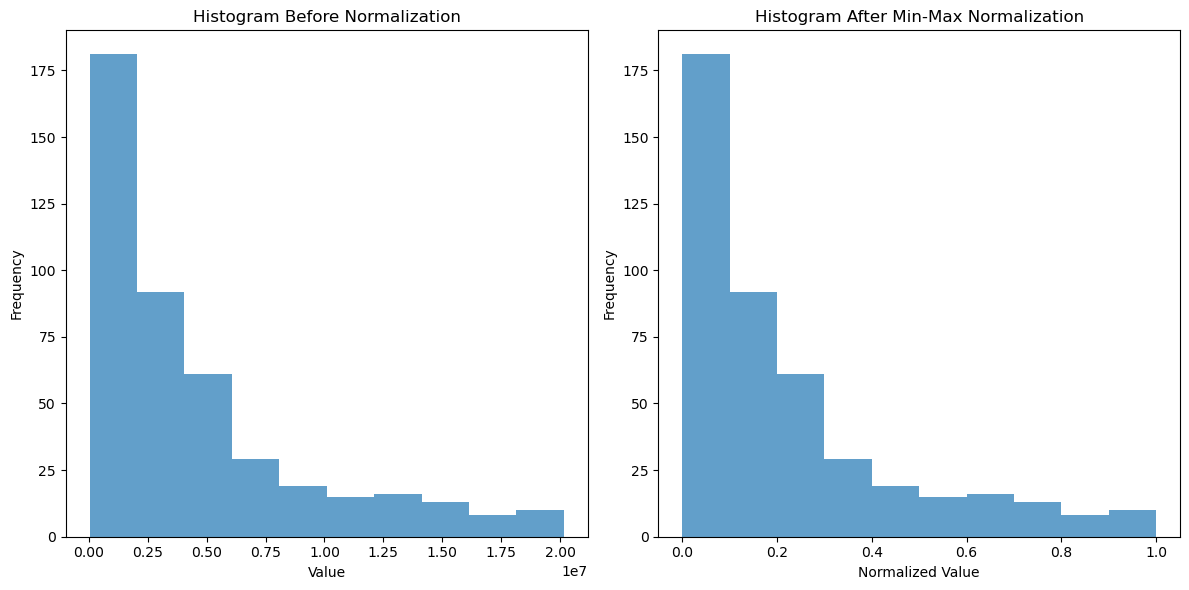

In [27]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(df['Salary'], bins=10, alpha=0.7)
plt.title('Histogram Before Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')


min_value = df['Salary'].min()
max_value = df['Salary'].max()
min_max_normalized = df['Salary'].apply(lambda x: (x - min_value) / (max_value - min_value))


plt.subplot(1, 2, 2)
plt.hist(min_max_normalized, bins=10, alpha=0.7)
plt.title('Histogram After Min-Max Normalization')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()             # no changes 


In [23]:
skewness=df[numerical_col].skew()
skewness                                 # skweness is reduced 

Number   0.80
Age      0.66
Weight   0.09
Salary   1.50
dtype: float64

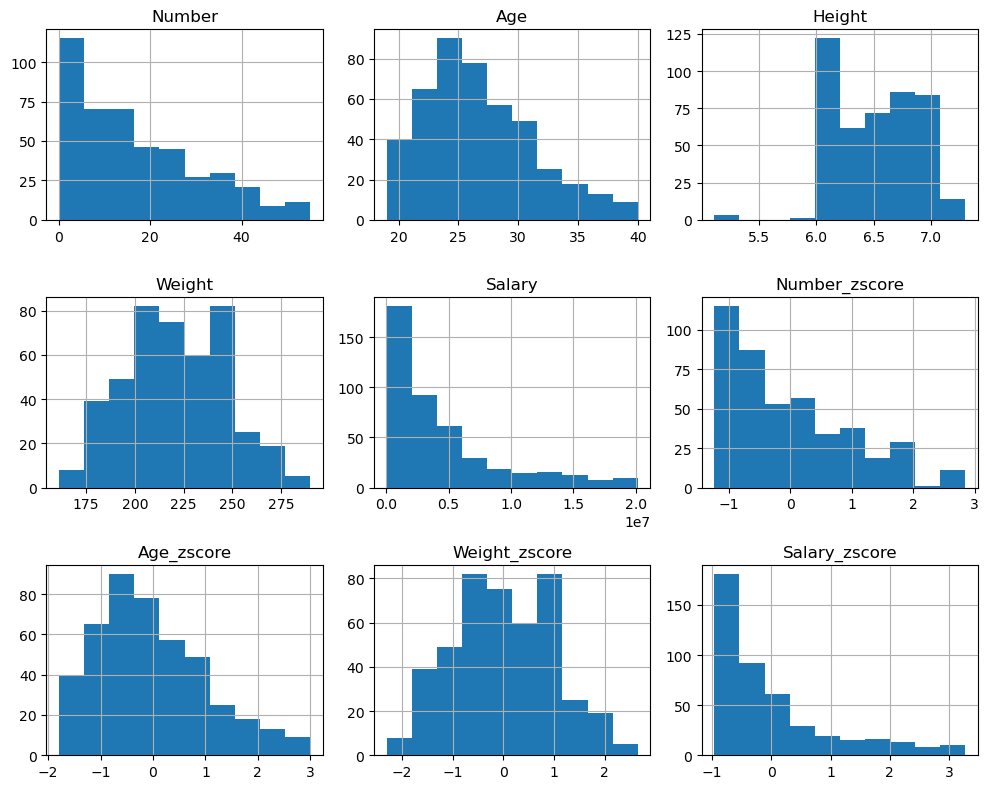

In [34]:
df.hist(figsize=(10, 8))  
plt.tight_layout()  
plt.show()

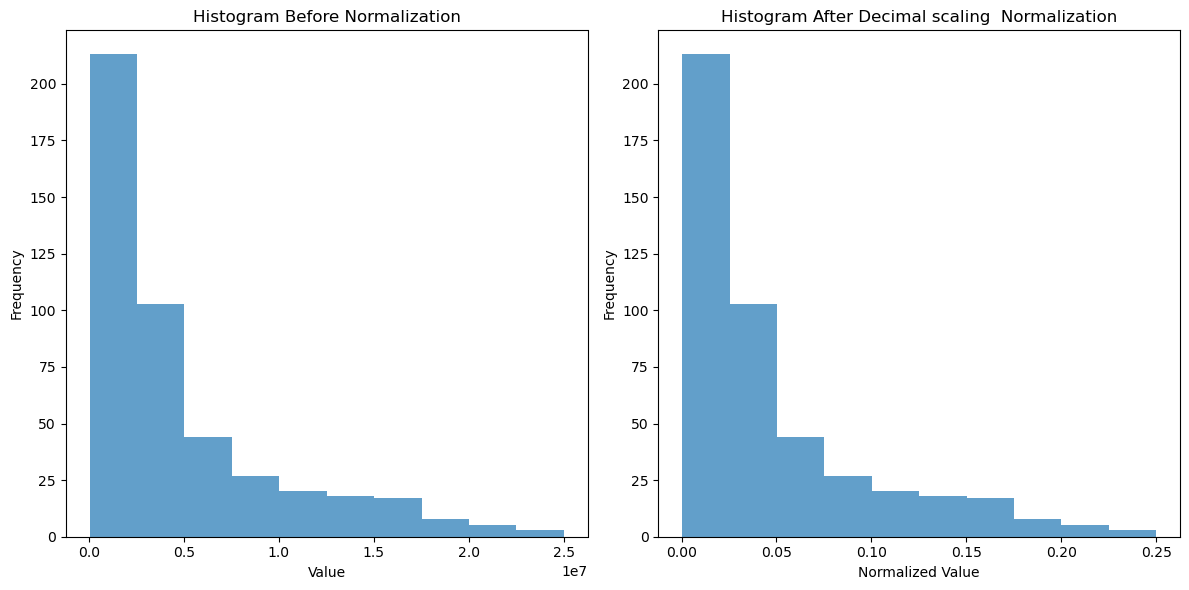

In [21]:
max_salary = df['Salary'].max()


j = len(str(int(max_salary))) - 1


df['Salary_normalized_d'] = df['Salary'] / (10 ** j)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(df['Salary'], bins=10, alpha=0.7)
plt.title('Histogram Before Normalization')
# plt.xlim(30888.0,25000000.0)
plt.xlabel('Value')
plt.ylabel('Frequency')


max_salary = df['Salary'].max()


# j = len(str(int(max_salary))) - 1

max_val = np.max(np.abs(df['Salary']))
    
    # Calculate the scaling factor j
j = np.ceil(np.log10(max_val))

df['Salary_normalized_d'] = df['Salary'] / (10 ** j)


plt.subplot(1, 2, 2)
plt.hist(df['Salary_normalized_d'], bins=10, alpha=0.7)
plt.title('Histogram After Decimal scaling  Normalization')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
# plt.xlim(-1,1)
plt.tight_layout()
plt.show()        # no changes 
